In [4]:
%pip install gurobipy

import pandas as pd

import gurobipy as gp
from gurobipy import GRB
import random
import numpy as np

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 75.7 MB/s eta 0:00:00


In [5]:
# Creating donor supply limits, storage capacity limits, and consumer demand.
donor_number = 2
storage_number = 6
region_number = 6

storage_cost_per_unit = 12
trade_off_values = []
total_costs = []
transportation_costs = []
storage_costs = []

In [6]:
# Generating random supply, demand, storage and open values for the specified number of donors, regions and facilities
supply_values = np.random.normal(175000, 15000, size=donor_number)
supply = {f'Donor{i+1}': max(0, supply_values[i]) for i in range(donor_number)}

storage_values = np.random.randint(20000, 120000, size=storage_number)
storage = {f'Facility{i+1}': storage_values[i] for i in range(len(storage_values))}

demand_values = np.random.normal(40000, 10000, size=region_number)
demand = {f'Region{i+1}': max(0, demand_values[i]) for i in range(region_number)}

opencost_values = np.random.randint(0, 15000, size=storage_number)
opencost = {f'Facility{i+1}': opencost_values[i] for i in range(len(opencost_values))}

In [7]:
# Incorporating time sensitivity and transportation constraints
# Example: Adding time constraints for delivery
# Generating random delivery times between donors and facilities
delivery_time_donors_facilities = {('Donor' + str(donor), 'Facility' + str(facility)): np.random.uniform(0.1, 2.0)
                                   for donor in range(1, donor_number + 1)
                                   for facility in range(1, storage_number + 1)}

# Generating random delivery times between donors and regions
delivery_time_donors_regions = {('Donor' + str(donor), 'Region' + str(region)): np.random.uniform(0.5, 3.0)
                                for donor in range(1, donor_number + 1)
                                for region in range(1, region_number + 1)}

# Generating random delivery times between facilities and regions
delivery_time_facilities_regions = {('Facility' + str(facility), 'Region' + str(region)): np.random.uniform(0.2, 1.5)
                                    for facility in range(1, storage_number + 1)
                                    for region in range(1, region_number + 1)}

# Merging the generated delivery times dictionaries
delivery_time = {**delivery_time_donors_facilities, **delivery_time_donors_regions, **delivery_time_facilities_regions}

# Display the generated random delivery times
print("Generated Delivery Times:")
print(delivery_time)

Generated Delivery Times:
{('Donor1', 'Facility1'): 1.5643552557222804, ('Donor1', 'Facility2'): 0.7966570158768669, ('Donor1', 'Facility3'): 1.0732725380787889, ('Donor1', 'Facility4'): 0.9226820228805304, ('Donor1', 'Facility5'): 0.8401010727370651, ('Donor1', 'Facility6'): 1.7885216158617243, ('Donor2', 'Facility1'): 0.2926572483066683, ('Donor2', 'Facility2'): 1.9159267825056825, ('Donor2', 'Facility3'): 1.7671419671768727, ('Donor2', 'Facility4'): 0.3534632651524019, ('Donor2', 'Facility5'): 1.5946737436027008, ('Donor2', 'Facility6'): 1.3529094786610114, ('Donor1', 'Region1'): 2.0196163248937955, ('Donor1', 'Region2'): 2.6501981859653654, ('Donor1', 'Region3'): 2.289987325354155, ('Donor1', 'Region4'): 1.9912315022016676, ('Donor1', 'Region5'): 1.8738375355819925, ('Donor1', 'Region6'): 0.7035671571599231, ('Donor2', 'Region1'): 1.2770874057178467, ('Donor2', 'Region2'): 2.2766476936035573, ('Donor2', 'Region3'): 1.001799597241762, ('Donor2', 'Region4'): 2.6188237172520252, ('Don

In [8]:
# Generating random vehicle capacities between donors, facilities, and regions
vehicle_capacities = {
    ('Donor' + str(donor), 'Facility' + str(facility)): np.random.randint(10000, 100000)
    for donor in range(1, donor_number + 1)
    for facility in range(1, storage_number + 1)}

vehicle_capacities.update({
    ('Donor' + str(donor), 'Region' + str(region)): np.random.randint(20000, 800000)
    for donor in range(1, donor_number + 1)
    for region in range(1, region_number + 1)})

vehicle_capacities.update({
    ('Facility' + str(facility), 'Region' + str(region)): np.random.randint(30000, 120000)
    for facility in range(1, storage_number + 1)
    for region in range(1, region_number + 1)})

# Display the generated random vehicle capacities
print("Generated Vehicle Capacities:")
print(vehicle_capacities)

Generated Vehicle Capacities:
{('Donor1', 'Facility1'): 72302, ('Donor1', 'Facility2'): 51061, ('Donor1', 'Facility3'): 60276, ('Donor1', 'Facility4'): 97564, ('Donor1', 'Facility5'): 99397, ('Donor1', 'Facility6'): 42373, ('Donor2', 'Facility1'): 46613, ('Donor2', 'Facility2'): 43540, ('Donor2', 'Facility3'): 48377, ('Donor2', 'Facility4'): 76263, ('Donor2', 'Facility5'): 91941, ('Donor2', 'Facility6'): 96557, ('Donor1', 'Region1'): 685706, ('Donor1', 'Region2'): 36522, ('Donor1', 'Region3'): 110492, ('Donor1', 'Region4'): 380502, ('Donor1', 'Region5'): 95727, ('Donor1', 'Region6'): 243767, ('Donor2', 'Region1'): 357470, ('Donor2', 'Region2'): 506865, ('Donor2', 'Region3'): 322734, ('Donor2', 'Region4'): 111743, ('Donor2', 'Region5'): 509303, ('Donor2', 'Region6'): 326369, ('Facility1', 'Region1'): 114157, ('Facility1', 'Region2'): 75590, ('Facility1', 'Region3'): 105066, ('Facility1', 'Region4'): 44537, ('Facility1', 'Region5'): 92735, ('Facility1', 'Region6'): 102292, ('Facility2', 

In [9]:
edges = {}
costs = {}
# Generate random edges and costs for donors to facilities
for donor in range(1, donor_number + 1):
    for facility in range(1, storage_number + 1):
        if np.random.rand() < 0.6:  # Assign with a probability of 60%
          edges[('Donor' + str(donor), 'Facility' + str(facility))] = np.random.rand()
          costs[('Donor' + str(donor), 'Facility' + str(facility))] = np.random.rand() * 2.0

# Generate random edges and costs for donors to regions
for donor in range(1, donor_number + 1):
    for region in range(1, region_number + 1):
        if np.random.rand() < 0.5:  # Assign with a probability of 50%
            edges[('Donor' + str(donor), 'Region' + str(region))] = np.random.rand()
            costs[('Donor' + str(donor), 'Region' + str(region))] = np.random.rand() * 2.0

# Generate random edges and costs for facilities to regions
for facility in range(1, storage_number + 1):
    for region in range(1, region_number + 1):
        if np.random.rand() < 0.7:  # Assign with a probability of 70%
            edges[('Facility' + str(facility), 'Region' + str(region))] = np.random.rand()
            costs[('Facility' + str(facility), 'Region' + str(region))] = np.random.rand() * 2.0

In [10]:
for trade_off_value in np.arange(0, 1.1, 0.1):
    model = gp.Model('FoodDonationNetworkDesign')
    facilities = storage.keys()

    flow = model.addVars(edges, obj=costs, name="flow")

    open = model.addVars(facilities, obj=opencost, vtype=GRB.BINARY, name="open")
    expand = model.addVar(obj=3000, vtype=GRB.BINARY, name="expand")

    open['Facility2'].lb = 1
    open['Facility3'].lb = 1
    model.objcon = -(opencost['Facility1'] + opencost['Facility4'])
    # Contsraints
    # Incorporating delivery times and vehicle capacities for Donor to Facility
    for edge in edges:
         if 'Donor' in edge[0] and 'Facility' in edge[1]:
             model.addConstr(flow[edge] <= vehicle_capacities[edge] * delivery_time_donors_facilities[edge])

    # Incorporating delivery times and vehicle capacities for Donor to Region
    for edge in edges:
           if 'Donor' in edge[0] and 'Region' in edge[1]:
              model.addConstr(flow[edge] <= vehicle_capacities[edge] * delivery_time_donors_regions[edge])
    # Incorporating delivery times and vehicle capacities for Facility to Region
    for edge in edges:
        if 'Facility' in edge[0] and 'Region' in edge[1]:
            model.addConstr(flow[edge] <= vehicle_capacities[edge] * delivery_time_facilities_regions[edge])

    # Donor capacity limits
    donors = supply.keys()
    donor_flow = model.addConstrs((gp.quicksum(flow.select(donor, '*')) <= supply[donor] for donor in donors), name="donor")

    # Consumer demand
    regions = demand.keys()
    consumer_flow = model.addConstrs((gp.quicksum(flow.select('*', region)) == demand[region] for region in regions), name="consumer")

    # Storage flow conservation
    facilities = storage.keys()
    storage_flow = model.addConstrs((gp.quicksum(flow.select(facility, '*')) == gp.quicksum(flow.select('*', facility)) for facility in facilities), name="storage")

    # Storage Capacity
    all_but_facility2 = list(set(facilities) - set(['Facility2']))

    stoarge_capacity = model.addConstrs((gp.quicksum(flow.select(facility, '*')) <= storage[facility]*open[facility] for facility in all_but_facility2), name="storage_capacity")

    facility2_capacity = model.addConstr(gp.quicksum(flow.select('*', 'Facility2')) <= storage['Facility2'] + 20000*expand, name="facility2_capacity")

    # Storage Count
    facilities_count = model.addConstr(open.sum() <= 4)

    # Objective Function
    # Calculate total storage cost
    storage_cost = gp.quicksum(storage_cost_per_unit * storage[facility] * open[facility] for facility in facilities)

    # Calculate total transportation cost for donors to facilities
    transportation_cost_donors_to_facilities = gp.quicksum(costs[edge] * flow[edge] for edge in edges if 'Donor' in edge[0] and 'Facility' in edge[1])

    # Calculate total transportation cost for facilities to regions
    transportation_cost_facilities_to_regions = gp.quicksum(costs[edge] * flow[edge] for edge in edges if 'Facility' in edge[0] and 'Region' in edge[1])

    # Calculate total transportation cost for donors to regions
    transportation_cost_donors_to_regions = gp.quicksum(costs[edge] * flow[edge] for edge in edges if 'Donor' in edge[0] and 'Region' in edge[1])

    # Objective function in calculating total cost considering the current trade-off value (transportation cost + storage cost)
    total_cost = (1 - trade_off_value) * (transportation_cost_donors_to_facilities + transportation_cost_facilities_to_regions +
                                          transportation_cost_donors_to_regions) + (trade_off_value * storage_cost)

    # Set objective to minimize total cost
    model.setObjective(total_cost, gp.GRB.MINIMIZE)
    model.optimize()

    # Check the optimization status and store objective value if optimal
    if model.status == gp.GRB.OPTIMAL:
      transportation_costs.append(transportation_cost_donors_to_facilities.getValue() + transportation_cost_facilities_to_regions.getValue() + transportation_cost_donors_to_regions.getValue())
      storage_costs.append(storage_cost.getValue())
      total_costs.append(total_cost.getValue())
      trade_off_values.append(trade_off_value)
    else:
      print(f"Optimization for trade-off value {trade_off_value} did not result in an optimal solution.")

Restricted license - for non-production use only - expires 2025-11-24
Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (linux64 - "Ubuntu 22.04.3 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 59 rows, 45 columns and 147 nonzeros
Model fingerprint: 0xa09a4cae
Variable types: 38 continuous, 7 integer (7 binary)
Coefficient statistics:
  Matrix range     [1e+00, 9e+04]
  Objective range  [4e-02, 2e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [4e+00, 1e+06]
Presolve removed 40 rows and 5 columns
Presolve time: 0.00s
Presolved: 19 rows, 40 columns, 96 nonzeros
Variable types: 36 continuous, 4 integer (4 binary)
Found heuristic solution: objective 311701.43569
Found heuristic solution: objective 278688.67316

Root relaxation: objective 2.346792e+05, 15 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective B

In [11]:
# Initializing an empty list to store the optimal flow values
optimal_flows = []

# Checking if optimization was successful
if model.status == gp.GRB.OPTIMAL:
    # Collecting optimal flow values for edges with non-zero flows
    for edge in edges:
        if flow[edge].x > 1e-6:
            optimal_flows.append({"From": edge[0], "To": edge[1], "Flow": flow[edge].x})

    # Creating the DataFrame 'food_flow' from the collected optimal flow values
    food_flow = pd.DataFrame(optimal_flows)
    food_flow.index = [''] * len(food_flow)
    print(food_flow)
else:
    print("Optimization did not result in an optimal solution.")

       From         To          Flow
     Donor1  Facility2  40678.103888
     Donor1  Facility3  28798.453156
     Donor1  Facility4  41935.907261
     Donor2  Facility3  15874.546844
     Donor1    Region1  34651.707462
     Donor1    Region4  40688.312277
     Donor2    Region6  37993.406728
  Facility2    Region2  28952.362067
  Facility2    Region3   3993.885929
  Facility2    Region5   7731.855892
  Facility3    Region2   6487.421939
  Facility3    Region5  38185.578061
  Facility4    Region2   9563.000521
  Facility4    Region3  32372.906739


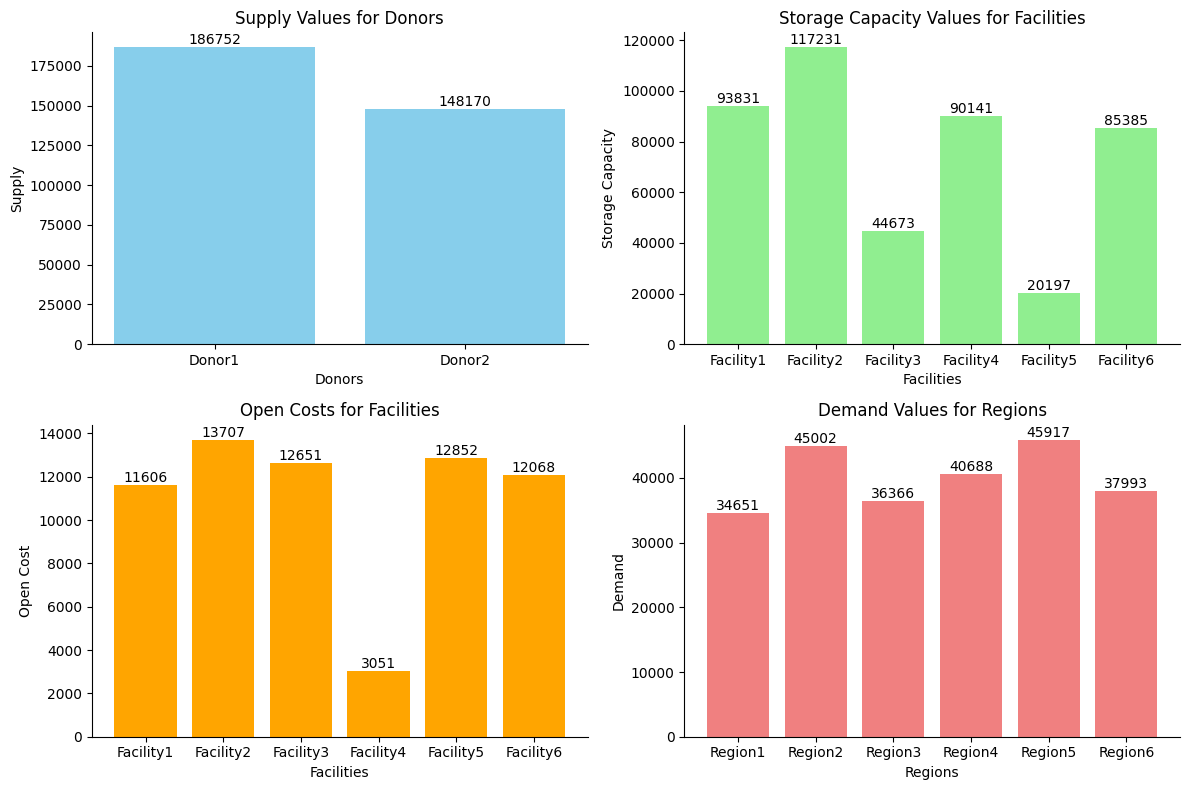

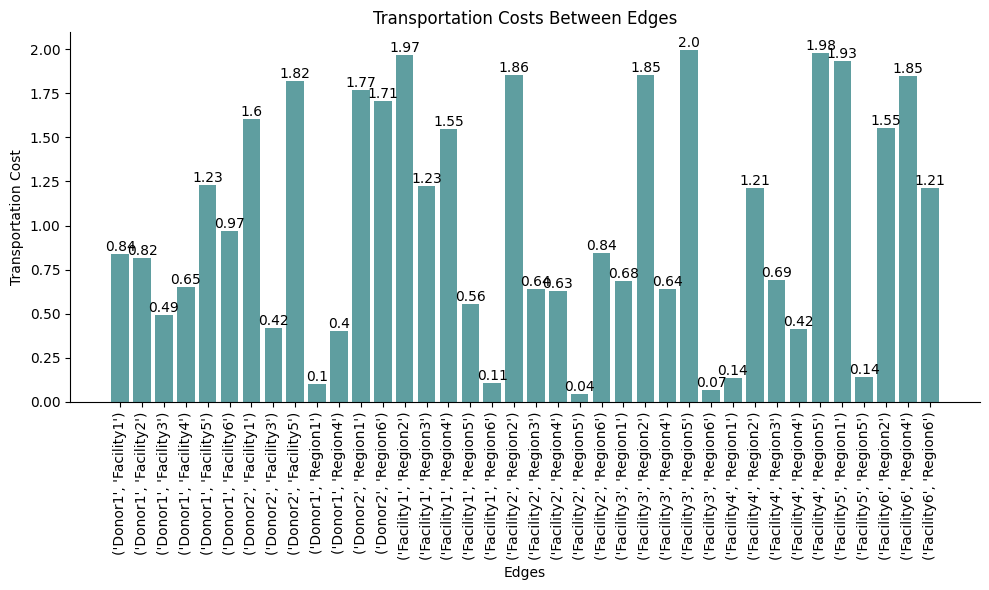

In [12]:
# Plotting all the input graphs
import matplotlib.pyplot as plt

# Setting up subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plotting supply values for donors
bar1 = axs[0, 0].bar(supply.keys(), supply.values(), color='skyblue')
axs[0, 0].set_xlabel('Donors')
axs[0, 0].set_ylabel('Supply')
axs[0, 0].set_title('Supply Values for Donors')
axs[0, 0].spines['right'].set_visible(False)
axs[0, 0].spines['top'].set_visible(False)
for bar in bar1:
    height = bar.get_height()
    axs[0, 0].text(bar.get_x() + bar.get_width() / 2, height, '%d' % int(height), ha='center', va='bottom')

# Plotting storage capacity values for facilities
bar2 = axs[0, 1].bar(storage.keys(), storage.values(), color='lightgreen')
axs[0, 1].set_xlabel('Facilities')
axs[0, 1].set_ylabel('Storage Capacity')
axs[0, 1].set_title('Storage Capacity Values for Facilities')
axs[0, 1].spines['right'].set_visible(False)
axs[0, 1].spines['top'].set_visible(False)
for bar in bar2:
    height = bar.get_height()
    axs[0, 1].text(bar.get_x() + bar.get_width() / 2, height, '%d' % int(height), ha='center', va='bottom')

# Plotting open costs for facilities
bar3 = axs[1, 0].bar(opencost.keys(), opencost.values(), color='orange')
axs[1, 0].set_xlabel('Facilities')
axs[1, 0].set_ylabel('Open Cost')
axs[1, 0].set_title('Open Costs for Facilities')
axs[1, 0].spines['right'].set_visible(False)
axs[1, 0].spines['top'].set_visible(False)
for bar in bar3:
    height = bar.get_height()
    axs[1, 0].text(bar.get_x() + bar.get_width() / 2, height, '%d' % int(height), ha='center', va='bottom')

# Plotting demand values for regions
bar4 = axs[1, 1].bar(demand.keys(), demand.values(), color='lightcoral')
axs[1, 1].set_xlabel('Regions')
axs[1, 1].set_ylabel('Demand')
axs[1, 1].set_title('Demand Values for Regions')
axs[1, 1].spines['right'].set_visible(False)
axs[1, 1].spines['top'].set_visible(False)
for bar in bar4:
    height = bar.get_height()
    axs[1, 1].text(bar.get_x() + bar.get_width() / 2, height, '%d' % int(height), ha='center', va='bottom')

# Adjust layout
plt.tight_layout()

# Plotting transportation costs between nodes
edges_list = list(edges.keys())
costs_list = list(costs.values())

plt.figure(figsize=(10, 6))
plt.bar(range(len(costs_list)), costs_list, color='cadetblue')
plt.xlabel('Edges')
plt.ylabel('Transportation Cost')
plt.title('Transportation Costs Between Edges')
plt.xticks(range(len(costs_list)), edges_list, rotation=90)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
for i, cost in enumerate(costs_list):
    plt.text(i, cost, str(round(cost, 2)), ha='center', va='bottom')
plt.tight_layout()

plt.show()

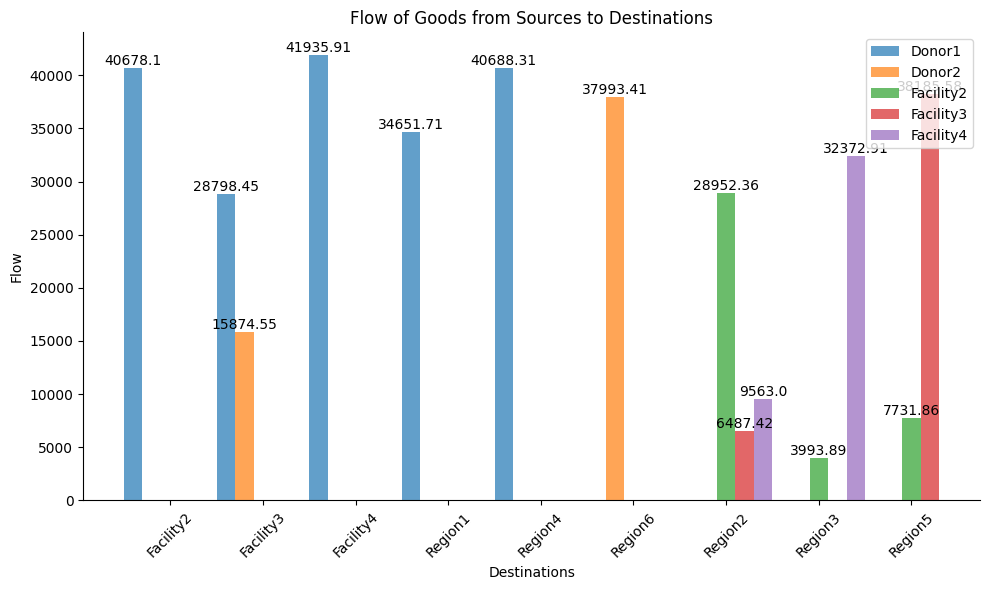

In [13]:
# Plotting the output graphs
import matplotlib.pyplot as plt
import numpy as np

# Assuming food_flow is the DataFrame obtained after optimization

# Extract unique sources and destinations
sources = food_flow['From'].unique()
destinations = food_flow['To'].unique()

# Create a dictionary to store the flow from each source to each destination
flow_data = {source: {dest: 0 for dest in destinations} for source in sources}

# Fill the flow_data dictionary with actual flow values
for index, row in food_flow.iterrows():
    source = row['From']
    dest = row['To']
    flow = row['Flow']
    flow_data[source][dest] = flow

# Plotting the flow of goods
plt.figure(figsize=(10, 6))

x = np.arange(len(destinations))  # X positions for the bars

bar_width = 0.2  # Width of each bar
bar_positions = [x + i * bar_width for i in range(len(sources))]

for i, source in enumerate(sources):
    # Filter out destinations with zero flow values for each source
    flow_values = [flow_data[source][dest] for dest in destinations if flow_data[source][dest] != 0]
    positions = [bar_positions[i][j] for j, dest in enumerate(destinations) if flow_data[source][dest] != 0]
    plt.bar(positions, flow_values, label=source, width=bar_width, alpha=0.7)

plt.xlabel('Destinations')
plt.ylabel('Flow')
plt.title('Flow of Goods from Sources to Destinations')
plt.legend()
plt.xticks(x + (len(sources) - 1) * bar_width / 2, [dest for dest in destinations if any(flow_data[source][dest] != 0 for source in sources)], rotation=45)  # Set x-tick labels
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

# Show values on top of each bar
for i, source in enumerate(sources):
    for j, dest in enumerate(destinations):
        if flow_data[source][dest] != 0:
            plt.text(bar_positions[i][j], flow_data[source][dest], str(round(flow_data[source][dest], 2)), ha='center', va='bottom')

plt.tight_layout()
plt.show()

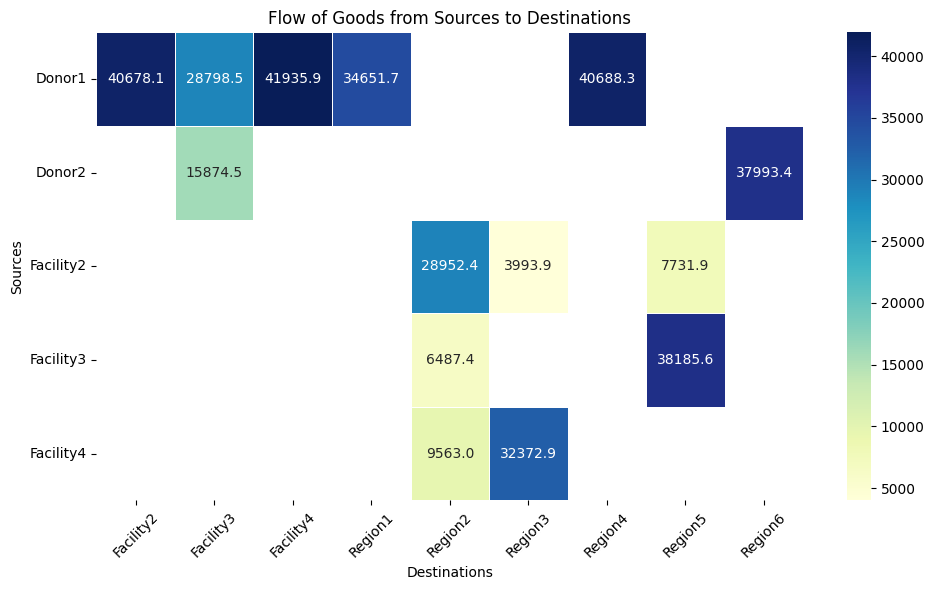

In [14]:
# Plotting output graphs
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming food_flow is the DataFrame obtained after optimization

# Pivot the food_flow dataframe to prepare for the heatmap
pivot_flow = food_flow.pivot(index='From', columns='To', values='Flow')

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_flow, annot=True, cmap='YlGnBu', fmt='.1f', linewidths=0.5)
plt.title('Flow of Goods from Sources to Destinations')
plt.xlabel('Destinations')
plt.ylabel('Sources')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()

plt.show()

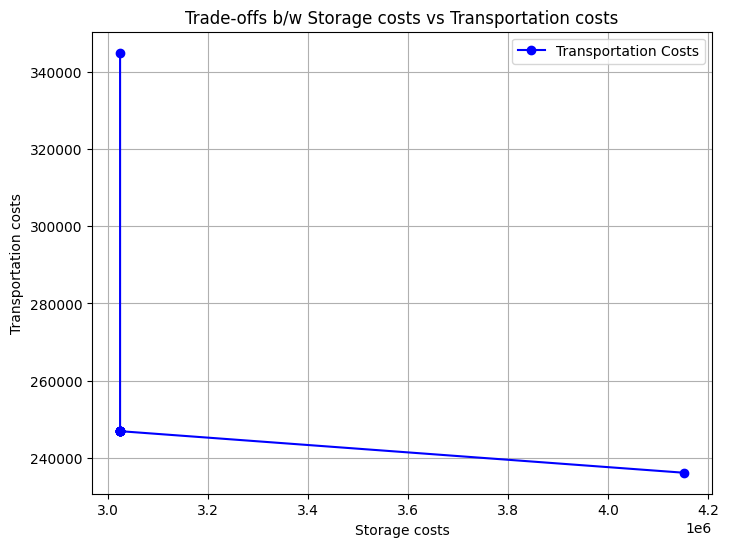

In [15]:
# Plotting different components on the same graph against trade-off values
plt.figure(figsize=(8, 6))

plt.plot(storage_costs, transportation_costs, marker='o', linestyle='-', color='blue', label='Transportation Costs')

plt.xlabel('Storage costs')
plt.ylabel('Transportation costs')
plt.title('Trade-offs b/w Storage costs vs Transportation costs')
plt.legend()
plt.grid(True)

plt.show()